## Python para Investimentos - API Banco Central do Brasil\

**Autor:** Eduardo B. Scheffer

**Data:** 30/08/2020

**Objetivo:** Pegar dados do IPCA, IGPM, Selic, reservas Internacionais, PNADC (taxa de desemprego)
    
**Fonte:** <a href=https://youtu.be/7rFsu48oBn8>"Python para Investimentos #10"</a>

### Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
                
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

### Obtendo Dados através da API do BACEN

In [2]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True) # Setar primeira coluna no formato de data, especificando que seu primeiro valor é o dia
  df.set_index('data', inplace=True) # Especificar coluna data é o índice da tabela
  return df

### Exemplo de Consultas à API do Banco Central do Brasil

In [3]:
ipca = consulta_bc(433)

In [4]:
igpm = consulta_bc(189)

<AxesSubplot:xlabel='data'>

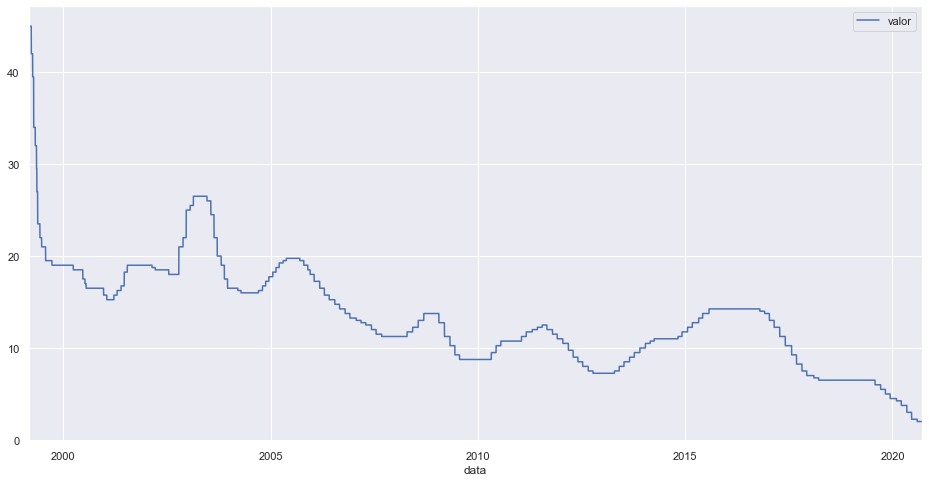

In [5]:
selic_meta = consulta_bc(432)
selic_meta.plot()

<AxesSubplot:xlabel='data'>

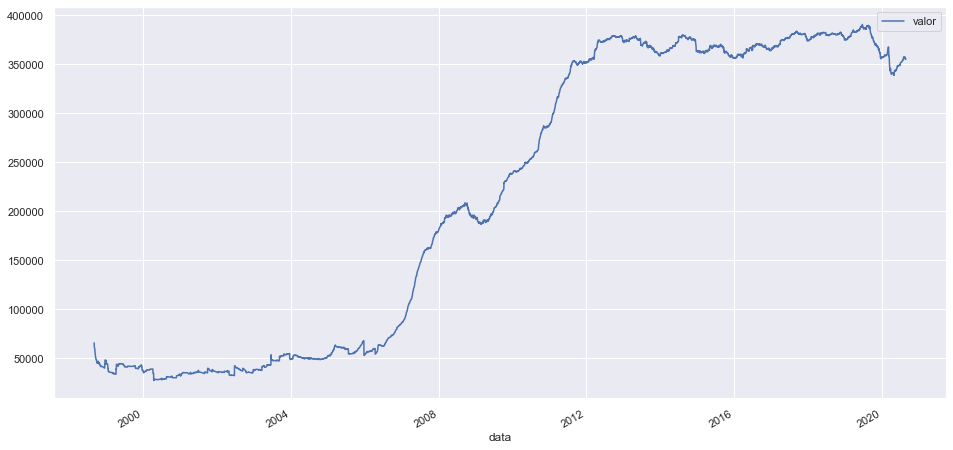

In [18]:
reservas_internacionais = consulta = consulta_bc(13621)
reservas_internacionais.plot()

In [19]:
pnad = consulta_bc(24369)
pnad

,valor
data,
2012-03-01,7.9
2012-04-01,7.7
2012-05-01,7.6
2012-06-01,7.5
2012-07-01,7.4
...,...
2020-02-01,11.6
2020-03-01,12.2
2020-04-01,12.6


## CDI vs IBOV

### Importar Biblioteca do Yahoo Finance

In [6]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yfs

Requirement already up-to-date: yfinance in /Applications/anaconda3/envs/python3/lib/python3.8/site-packages (0.1.54)


In [60]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [71]:
ibov_retorno = ibov.pct_change()

In [7]:
cdi = consulta_bc(12)

In [85]:
data_inicio = '2000-01-01'

In [86]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1 # Normalizar retorno na primeira data como 1

In [87]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

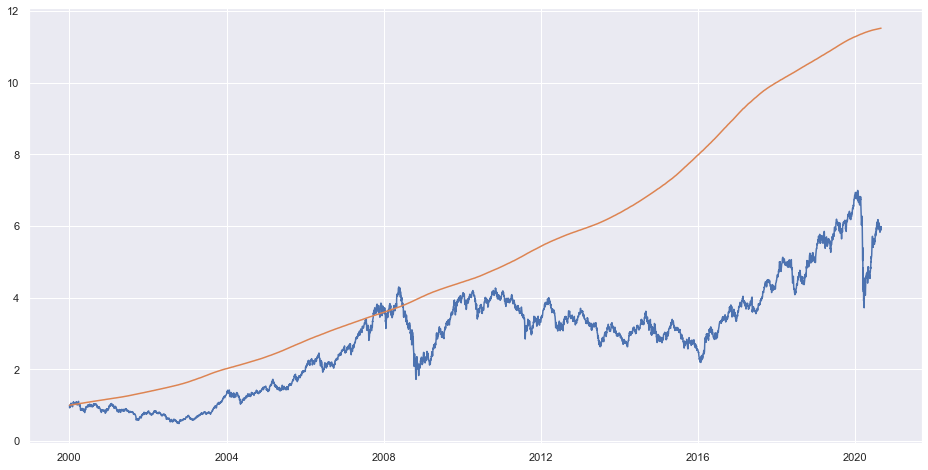

In [88]:
fig, ax = plt.subplots()
ax.plot (ibov_retorno_acumulado)
ax.plot (cdi_acumulado)